In [2]:
import os
import pandas as pd

In [15]:
l3_pre=['next_line','no']
l2_pre=['ip_stride','next_line','no']
l1_pre=['next_line','no']
replacement=['lru','ship','srrip','drrip']
trace_code = ['436','437','450','462','482']
config = [l1+'-'+l2+'-'+l3+'-'+rep  for l3 in l3_pre for l2 in l2_pre for l1 in l1_pre for rep in replacement]

In [16]:
res_list = os.listdir('res')

In [17]:
blank_list = [ [0 for i in range(len(trace_code))] for j in range(len(config))]

In [18]:
IPC = pd.DataFrame(blank_list,index=config,columns= trace_code)

In [20]:
for trace_res in res_list:
    dir = 'res/'+trace_res+'/'
    log_list = os.listdir(dir)
    for log in log_list:
        test_config = log.split('-')
        trace_code = test_config[0]
        l1_pref = test_config[1]
        l2_pref = test_config[2]
        l3_pref = test_config[3]
        repl = test_config[4].split('.')[0]
        log_config = l1_pref+'-'+l2_pref+'-'+l3_pref+'-'+repl
        with open(dir+log,'r') as f:
            lines = f.readlines()
            for line in lines:
                if line[0:8] == "Finished":
                    t = line.find("IPC")
                    res = float(line[t+5:t+12])
                    log_index = config.index(log_config)
                    IPC.loc[log_config,trace_code] = res
                    #print("score: %f"  %( float(line[t+5:t+12])))



In [23]:
IPC = IPC.sort_index()

In [26]:
IPC['avg'] = IPC.mean(axis=1)

In [28]:
IPC.to_csv('IPC_origin.csv')

In [33]:
IPC_sort = IPC.sort_values(by = 'avg', ascending = False)

In [34]:
IPC_sort

,436,437,450,462,482,459,avg
next_line-ip_stride-next_line-drrip,0.39357,0.98802,0.37274,0.70679,1.25477,0.91745,0.772223
next_line-ip_stride-next_line-lru,0.39361,0.98675,0.37568,0.72553,1.19622,0.92179,0.766597
next_line-ip_stride-next_line-ship,0.39358,0.98839,0.38446,0.68971,1.22407,0.91511,0.765887
next_line-ip_stride-next_line-srrip,0.39375,0.98888,0.38263,0.67658,1.23575,0.91169,0.764880
next_line-ip_stride-no-ship,0.39363,0.95320,0.38524,0.67352,1.26065,0.85670,0.753823
next_line-ip_stride-no-drrip,0.39379,0.95948,0.38872,0.64779,1.25869,0.85137,0.749973
no-ip_stride-next_line-ship,0.38999,0.96955,0.36566,0.72366,1.12422,0.87452,0.741267
no-ip_stride-next_line-drrip,0.38998,0.96180,0.35511,0.72605,1.13775,0.87540,0.741015
no-ip_stride-next_line-lru,0.39003,0.95811,0.35777,0.75466,1.09569,0.88233,0.739765
next_line-ip_stride-no-srrip,0.39364,0.96246,0.37558,0.65845,1.19479,0.85010,0.739170


In [35]:
IPC_sort.to_csv('IPC_sort.csv')

<Axes: >

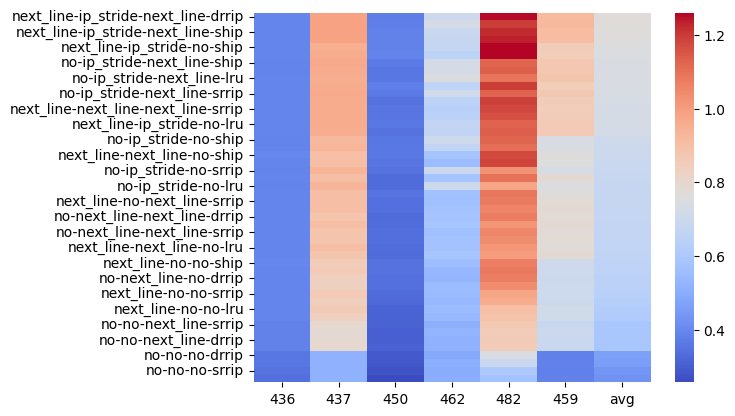

In [39]:
import seaborn as sns
sns.heatmap(IPC_sort,cmap='coolwarm')